Question 1

Step 1. Import the necessary libraries
Step 2. Import the dataset from this address.
Step 3. Assign it to a variable called users
Step 4. Discover what is the mean age per occupation
Step 5. Discover the Male ratio per occupation and sort it from the most to the least
Step 6. For each occupation, calculate the minimum and maximum ages
Step 7. For each combination of occupation and sex, calculate the mean age
Step 8. For each occupation present the percentage of women and men

In [5]:
#libraries
import pandas as pd

#importing data from link
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user"

#assigning users
users = pd.read_csv(url, sep='|', index_col='user_id')



#mean age per occupation
mean_age_per_occupation = users.groupby('occupation')['age'].mean()
print("Mean age per occupation:\n", mean_age_per_occupation)

#Discover the Male ratio per occupation and sort it from most to least
def male_ratio(series):
    male_count = (series == 'M').sum()
    total_count = len(series)
    return male_count / total_count

male_ratio_per_occupation = users.groupby('occupation')['gender'].apply(male_ratio).sort_values(ascending=False)
print("\nMale ratio per occupation (sorted):\n", male_ratio_per_occupation)

# Step 6: For each occupation, calculate the minimum and maximum ages
min_max_age_per_occupation = users.groupby('occupation')['age'].agg(['min', 'max'])
print("\nMinimum and maximum ages per occupation:\n", min_max_age_per_occupation)

# Step 7: For each combination of occupation and sex, calculate the mean age
mean_age_per_occupation_sex = users.groupby(['occupation', 'gender'])['age'].mean()
print("\nMean age for each occupation and sex:\n", mean_age_per_occupation_sex)

# Step 8: For each occupation, present the percentage of women and men
gender_percentage_per_occupation = users.groupby(['occupation', 'gender']).size().unstack().apply(lambda x: x / x.sum(), axis=1)
print("\nPercentage of women and men per occupation:\n", gender_percentage_per_occupation)


Mean age per occupation:
 occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

Male ratio per occupation (sorted):
 occupation
doctor           1.000000
engineer         0.970149
technician       0.962963
retired          0.928571
programmer       0.909091
executive        0.906250
scientist        0.903226
entertainment    0.888889
lawyer           0.833333
salesman         0.750000
educator         0.726316
student          0.693878
other    

In [8]:
# Step 1: Import the necessary libraries
import pandas as pd

# Step 2: Import the dataset from the provided address
url = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv"

# Step 3: Assign it to a variable called euro12
euro12 = pd.read_csv(url)

# Step 4: Select only the Goal column
goals = euro12['Goals']

# Step 5: How many teams participated in the Euro2012?
num_teams = euro12['Team'].nunique()

# Step 6: What is the number of columns in the dataset?
num_columns = euro12.shape[1]

# Step 7: View only the columns Team, Yellow Cards, and Red Cards and assign them to a dataframe called discipline
discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]

# Step 8: Sort the teams by Red Cards, then by Yellow Cards
discipline_sorted = discipline.sort_values(by=['Red Cards', 'Yellow Cards'], ascending=False)

# Step 9: Calculate the mean Yellow Cards given per Team
mean_yellow_cards = discipline['Yellow Cards'].mean()

# Print the results
print("Number of teams:", num_teams)
print("Number of columns in the dataset:", num_columns)
print("\nDiscipline dataframe:")
print(discipline_sorted)
print("\nMean Yellow Cards per Team:", mean_yellow_cards)


Number of teams: 16
Number of columns in the dataset: 35

Discipline dataframe:
                   Team  Yellow Cards  Red Cards
6                Greece             9          1
9                Poland             7          1
11  Republic of Ireland             6          1
7                 Italy            16          0
10             Portugal            12          0
13                Spain            11          0
0               Croatia             9          0
1        Czech Republic             7          0
14               Sweden             7          0
4                France             6          0
12               Russia             6          0
3               England             5          0
8           Netherlands             5          0
15              Ukraine             5          0
2               Denmark             4          0
5               Germany             4          0

Mean Yellow Cards per Team: 7.4375



Question 3

Housing
Step 1. Import the necessary libraries
Step 2. Create 3 differents Series, each of length 100, as follows:• The first a random number from 1 to 4• The second a random number from 1 to 3• The third a random number from 10,000 to 30,000
Step 3. Create a DataFrame by joinning the Series by column
Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter
Step 5. Create a one column DataFrame with the values of the 3 Series and assign itto 'bigcolumn'
Step 6. Ops it seems it is going only until index 99. Is it true?
Step 7. Reindex the DataFrame so it goes from 0 to 299

In [9]:
# Step 1: Import the necessary libraries
import numpy as np
import pandas as pd

# Step 2: Create 3 different Series
np.random.seed(42)  # Setting seed for reproducibility

series1 = pd.Series(np.random.randint(1, 5, size=100))
series2 = pd.Series(np.random.randint(1, 4, size=100))
series3 = pd.Series(np.random.randint(10000, 30001, size=100))

# Step 3: Create a DataFrame by joining the Series by column
housing_data = pd.DataFrame({'bedrs': series1, 'bathrs': series2, 'price_sqr_meter': series3})

# Step 4: Change the name of the columns
housing_data.columns = ['bedrs', 'bathrs', 'price_sqr_meter']

# Step 5: Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'
bigcolumn = pd.DataFrame(pd.concat([series1, series2, series3], axis=0))

# Step 6: Check if it is going only until index 99
print("Is it true that 'bigcolumn' goes only until index 99?", bigcolumn.index.max() == 99)

# Step 7: Reindex the DataFrame so it goes from 0 to 299
bigcolumn.reset_index(drop=True, inplace=True)

# Print the results
print("\nDataFrame 'housing_data':")
print(housing_data.head())
print("\nDataFrame 'bigcolumn':")
print(bigcolumn.head())


Is it true that 'bigcolumn' goes only until index 99? True

DataFrame 'housing_data':
   bedrs  bathrs  price_sqr_meter
0      3       3            23931
1      4       2            13627
2      1       2            26157
3      3       2            20173
4      3       2            28047

DataFrame 'bigcolumn':
   0
0  3
1  4
2  1
3  3
4  3


In [32]:
# Step 1,2,3: Import the necessary libraries
import pandas as pd
import numpy as np
import datetime

url = 'wind.txt' 
data = pd.read_table(url, sep='\s+', parse_dates=[[0, 1, 2]])

data.head()

C:\Users\cheta\AppData\Local\Temp\ipykernel_13236\2313581508.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_table(url, sep='\s+', parse_dates=[[0, 1, 2]])


,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,2061-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,2061-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,2061-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,2061-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [10]:
#Step 4. Year 2061? Do we really have data from this year? Create a function to fix it and apply it.
# The problem is that the dates are 2061 and so on...

# function that uses datetime
def fix_century(x):
  year = x.year - 100 if x.year > 1989 else x.year
  return datetime.date(year, x.month, x.day)

# apply the function fix_century on the column and replace the values to the right ones
data['Yr_Mo_Dy'] = data['Yr_Mo_Dy'].apply(fix_century)

# data.info()
data.head()

,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [11]:
#Step 5. Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns].

# transform Yr_Mo_Dy it to date type datetime64
data["Yr_Mo_Dy"] = pd.to_datetime(data["Yr_Mo_Dy"])

# set 'Yr_Mo_Dy' as the index
data = data.set_index('Yr_Mo_Dy')

data.head()
# data.info()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [12]:
#Step 6. Compute how many values are missing for each location over the entire record.
# "Number of non-missing values for each location: "
data.isnull().sum()

RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

In [13]:
#Step 7. Compute how many non-missing values there are in total.

#number of columns minus the number of missing values for each location
data.shape[0] - data.isnull().sum()

#or

data.notnull().sum()


RPT    6568
VAL    6571
ROS    6572
KIL    6569
SHA    6572
BIR    6574
DUB    6571
CLA    6572
MUL    6571
CLO    6573
BEL    6574
MAL    6570
dtype: int64

In [14]:
#Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and all the times.
data.sum().sum() / data.notna().sum().sum()

10.227883764282181

In [30]:
#Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the days
data.describe(percentiles=[])

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
count,6568.000000,6571.000000,6572.000000,6569.000000,6572.000000,6574.000000,6571.000000,6572.000000,6571.000000,6573.000000,6574.000000,6570.000000
mean,12.362987,10.644314,11.660526,6.306468,10.455834,7.092254,9.797343,8.495053,8.493590,8.707332,13.121007,15.599079
std,5.618413,5.267356,5.008450,3.605811,4.936125,3.968683,4.977555,4.499449,4.166872,4.503954,5.835037,6.699794
min,0.670000,0.210000,1.500000,0.000000,0.130000,0.000000,0.000000,0.000000,0.000000,0.040000,0.130000,0.670000
50%,11.710000,10.170000,10.920000,5.750000,9.960000,6.830000,9.210000,8.080000,8.170000,8.290000,12.500000,15.000000
max,35.800000,33.370000,33.840000,28.460000,37.540000,26.160000,30.370000,31.080000,25.880000,28.210000,42.380000,42.540000


In [29]:
#Step 10. Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day.
#A different set of numbers for each day.

# create the dataframe
day_stats = pd.DataFrame()

# this time we determine axis equals to one so it gets each row.
day_stats['min'] = data.min(axis = 1) # min
day_stats['max'] = data.max(axis = 1) # max 
day_stats['mean'] = data.mean(axis = 1) # mean
day_stats['std'] = data.std(axis = 1) # standard deviations

day_stats.head()

,min,max,mean,std
Yr_Mo_Dy,,,,
1961-01-01,9.29,18.50,13.018182,2.808875
1961-01-02,6.50,17.54,11.336364,3.188994
1961-01-03,6.17,18.50,11.641818,3.681912
1961-01-04,1.79,11.75,6.619167,3.198126
1961-01-05,6.17,13.33,10.630000,2.445356


In [24]:
#Step 11. Find the average windspeed in January for each location.
data.loc[data.index.month == 1].mean()

RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64

In [18]:
#Step 12. Downsample the record to a yearly frequency for each location.

data.groupby(data.index.to_period('A')).mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961,12.299583,10.351796,11.362369,6.958227,10.881763,7.729726,9.733923,8.858788,8.647652,9.835577,13.502795,13.680773
1962,12.246923,10.110438,11.732712,6.960440,10.657918,7.393068,11.020712,8.793753,8.316822,9.676247,12.930685,14.323956
1963,12.813452,10.836986,12.541151,7.330055,11.724110,8.434712,11.075699,10.336548,8.903589,10.224438,13.638877,14.999014
1964,12.363661,10.920164,12.104372,6.787787,11.454481,7.570874,10.259153,9.467350,7.789016,10.207951,13.740546,14.910301
1965,12.451370,11.075534,11.848767,6.858466,11.024795,7.478110,10.618712,8.879918,7.907425,9.918082,12.964247,15.591644
1966,13.461973,11.557205,12.020630,7.345726,11.805041,7.793671,10.579808,8.835096,8.514438,9.768959,14.265836,16.307260
1967,12.737151,10.990986,11.739397,7.143425,11.630740,7.368164,10.652027,9.325616,8.645014,9.547425,14.774548,17.135945
1968,11.835628,10.468197,11.409754,6.477678,10.760765,6.067322,8.859180,8.255519,7.224945,7.832978,12.808634,15.017486
1969,11.166356,9.723699,10.902000,5.767973,9.873918,6.189973,8.564493,7.711397,7.924521,7.754384,12.621233,15.762904


In [20]:
#Step 13. Downsample the record to a monthly frequency for each location.
data.groupby(data.index.to_period('M')).mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-01,14.841333,11.988333,13.431613,7.736774,11.072759,8.588065,11.184839,9.245333,9.085806,10.107419,13.880968,14.703226
1961-02,16.269286,14.975357,14.441481,9.230741,13.852143,10.937500,11.890714,11.846071,11.821429,12.714286,18.583214,15.411786
1961-03,10.890000,11.296452,10.752903,7.284000,10.509355,8.866774,9.644194,9.829677,10.294138,11.251935,16.410968,15.720000
1961-04,10.722667,9.427667,9.998000,5.830667,8.435000,6.495000,6.925333,7.094667,7.342333,7.237000,11.147333,10.278333
1961-05,9.860968,8.850000,10.818065,5.905333,9.490323,6.574839,7.604000,8.177097,8.039355,8.499355,11.900323,12.011613
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-08,9.645161,8.259355,9.032258,4.502903,7.368065,5.935161,5.650323,5.417742,7.241290,5.536774,10.466774,12.054194
1978-09,10.913667,10.895000,10.635000,5.725000,10.372000,9.278333,10.790333,9.583000,10.069333,8.939000,15.680333,19.391333
1978-10,9.897742,8.670968,9.295806,4.721290,8.525161,6.774194,8.115484,7.337742,8.297742,8.243871,13.776774,17.150000


In [21]:
#Step 14. Downsample the record to a weekly frequency for each location.
data.groupby(data.index.to_period('W')).mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1960-12-26/1961-01-01,15.040000,14.960000,13.170000,9.290000,NaN,9.870000,13.670000,10.250000,10.830000,12.580000,18.500000,15.040000
1961-01-02/1961-01-08,13.541429,11.486667,10.487143,6.417143,9.474286,6.435714,11.061429,6.616667,8.434286,8.497143,12.481429,13.238571
1961-01-09/1961-01-15,12.468571,8.967143,11.958571,4.630000,7.351429,5.072857,7.535714,6.820000,5.712857,7.571429,11.125714,11.024286
1961-01-16/1961-01-22,13.204286,9.862857,12.982857,6.328571,8.966667,7.417143,9.257143,7.875714,7.145714,8.124286,9.821429,11.434286
1961-01-23/1961-01-29,19.880000,16.141429,18.225714,12.720000,17.432857,14.828571,15.528571,15.160000,14.480000,15.640000,20.930000,22.530000
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-11-27/1978-12-03,14.934286,11.232857,13.941429,5.565714,10.215714,8.618571,9.642857,7.685714,9.011429,9.547143,11.835714,18.728571
1978-12-04/1978-12-10,20.740000,19.190000,17.034286,9.777143,15.287143,12.774286,14.437143,12.488571,13.870000,14.082857,18.517143,23.061429
1978-12-11/1978-12-17,16.758571,14.692857,14.987143,6.917143,11.397143,7.272857,10.208571,7.967143,9.168571,8.565714,11.102857,15.562857


In [22]:
#Step 15. Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for each week (assume that the first week starts on January 2 1961) for the first 52 weeks.
# resample data to 'W' week and use the functions

weekly = data.resample('W').agg(['min','max','mean','std'])

# slice it for the first 52 weeks and locations
weekly.loc[weekly.index[1:53], "RPT":"MAL"] .head(10)

RPT                                VAL                    \
              min    max       mean       std    min    max       mean   
Yr_Mo_Dy                                                                 
1961-01-08  10.58  18.50  13.541429  2.631321   6.63  16.88  11.486667   
1961-01-15   9.04  19.75  12.468571  3.555392   3.54  12.08   8.967143   
1961-01-22   4.92  19.83  13.204286  5.337402   3.42  14.37   9.862857   
1961-01-29  13.62  25.04  19.880000  4.619061   9.96  23.91  16.141429   
1961-02-05  10.58  24.21  16.827143  5.251408   9.46  24.21  15.460000   
1961-02-12  16.00  24.54  19.684286  3.587677  11.54  21.42  16.417143   
1961-02-19   6.04  22.50  15.130000  5.064609  11.63  20.17  15.091429   
1961-02-26   7.79  25.80  15.221429  7.020716   7.08  21.50  13.625714   
1961-03-05  10.96  13.33  12.101429  0.997721   8.83  17.00  12.951429   
1961-03-12   4.88  14.79   9.376667  3.732263   8.08  16.96  11.578571   

                        ROS         ...        CLO              BEL         \
                 std    min    max  ...       mean       std    min    max   
Yr_Mo_Dy                            ...                                      
1961-01-08  3.949525   7.62  12.33  ...   8.497143  1.704941   5.46  17.54   
1961-01-15  3.148945   7.08  19.50  ...   7.571429  4.084293   5.25  20.71   
1961-01-22  3.837785   7.29  20.79  ...   8.124286  4.783952   6.50  15.92   
1961-01-29  5.170224  12.67  25.84  ...  15.640000  3.713368  14.04  27.71   
1961-02-05  5.187395   9.04  19.70  ...   9.460000  2.839501   9.17  19.33   
1961-02-12  3.608373  13.67  21.34  ...  14.440000  1.746749  15.21  26.38   
1961-02-19  3.575012   6.13  19.41  ...  13.542857  2.531361  14.09  29.63   
1961-02-26  5.147348   6.08  22.42  ...  12.730000  4.920064   9.59  23.21   
1961-03-05  2.851955   8.17  13.67  ...  12.370000  1.593685  11.58  23.45   
1961-03-12  3.230167   7.54  16.38  ...  10.458571  3.655113  10.21  22.71   

                                   MAL                              
                 mean       std    min    max       mean       std  
Yr_Mo_Dy                                                            
1961-01-08  12.481429  4.349139  10.88  16.46  13.238571  1.773062  
1961-01-15  11.125714  5.552215   5.17  16.92  11.024286  4.692355  
1961-01-22   9.821429  3.626584   6.79  17.96  11.434286  4.237239  
1961-01-29  20.930000  5.210726  17.50  27.63  22.530000  3.874721  
1961-02-05  14.012857  4.210858   7.17  19.25  11.935714  4.336104  
1961-02-12  21.832857  4.063753  17.04  21.84  19.155714  1.828705  
1961-02-19  21.167143  5.910938  10.96  22.58  16.584286  4.685377  
1961-02-26  16.304286  5.091162   6.67  23.87  14.322857  6.182283  
1961-03-05  17.842857  4.332331   8.83  17.54  13.951667  3.021387  
1961-03-12  16.701429  4.358759   5.54  22.54  14.420000  5.769890  

[10 rows x 48 columns]

In [22]:
# Step 1. Import the necessary libraries
import pandas as pd

# Step 2. Import the dataset from the given address.
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"
chipo = pd.read_csv(url, sep='\t')

# Step 3. Assign it to a variable called chipo.

# Step 4. See the first 10 entries
print(chipo.head(10))

# Step 5. What is the number of observations in the dataset?
num_observations = len(chipo)
print(f"Number of observations: {num_observations}")

# Step 6. What is the number of columns in the dataset?
num_columns = len(chipo.columns)
print(f"Number of columns: {num_columns}")

# Step 7. Print the name of all the columns.
print("Column names:", chipo.columns)

# Step 8. How is the dataset indexed?
print("Indexing:", chipo.index)

# Step 9. Which was the most-ordered item?
most_ordered_item = chipo['item_name'].value_counts().idxmax()
print(f"Most-ordered item: {most_ordered_item}")

# Step 10. For the most-ordered item, how many items were ordered?
most_ordered_item_quantity = chipo[chipo['item_name'] == most_ordered_item]['quantity'].sum()
print(f"Quantity ordered for the most-ordered item: {most_ordered_item_quantity}")

# Step 11. What was the most ordered item in the choice_description column?
most_ordered_choice = chipo['choice_description'].value_counts().idxmax()
print(f"Most ordered item in choice_description: {most_ordered_choice}")

# Step 12. How many items were ordered in total?
total_items_ordered = chipo['quantity'].sum()
print(f"Total items ordered: {total_items_ordered}")

# Step 13. Turn the item price into a float
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:]))

# Check the item price type
print("Item price type after conversion:", chipo['item_price'].dtype)

# Step 14. How much was the revenue for the period in the dataset?
revenue = (chipo['quantity'] * chipo['item_price']).sum()
print(f"Revenue for the period: ${revenue:.2f}")

# Step 15. How many orders were made in the period?
num_orders = chipo['order_id'].nunique()
print(f"Number of orders: {num_orders}")

# Step 16. What is the average revenue amount per order?
average_revenue_per_order = revenue / num_orders
print(f"Average revenue per order: ${average_revenue_per_order:.2f}")

# Step 17. How many different items are sold?
num_different_items = chipo['item_name'].nunique()
print(f"Number of different items sold: {num_different_items}")


   order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   
5         3         1                           Chicken Bowl   
6         3         1                          Side of Chips   
7         4         1                          Steak Burrito   
8         4         1                       Steak Soft Tacos   
9         5         1                          Steak Burrito   

                                  choice_description item_price  
0                                                NaN     $2.39   
1                                       [Clementine]     $3.39   
2                                            [Apple]     $3.39   
3                              

In [ ]:
Questions 6
Create a line plot showing the number of marriages and divorces per capita in the U.S. 
between 1867 and 2014. Label both lines and show the legend.
Don't forget to label your axes

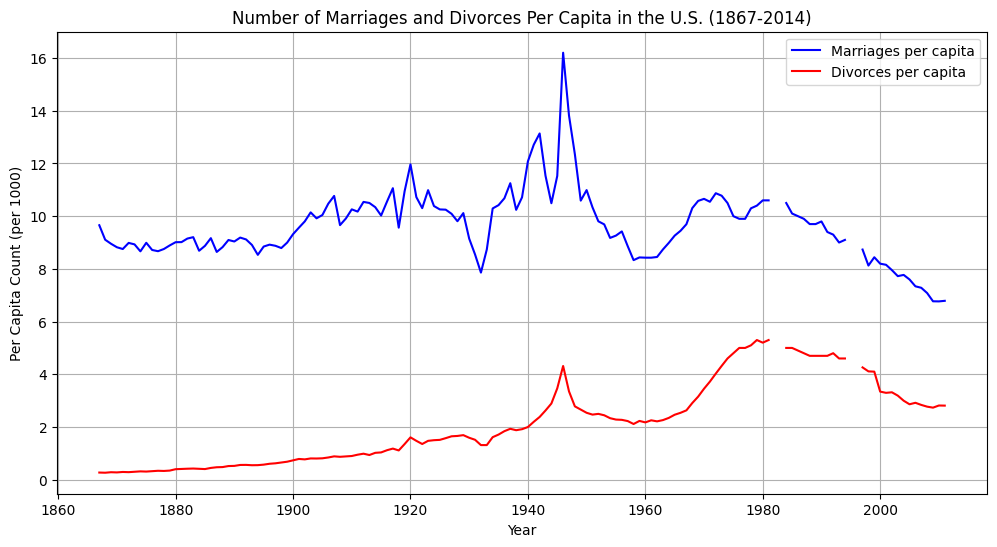

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file
data = pd.read_csv('us-marriages-divorces-1867-2014.csv')

# Calculate marriages and divorces per capita
data['Marriages_Per_Capita'] = data['Marriages'] / data['Population'] * 1000
data['Divorces_Per_Capita'] = data['Divorces'] / data['Population'] * 1000

# Line plot
plt.figure(figsize=(12, 6))
plt.plot(data['Year'], data['Marriages_Per_Capita'], label='Marriages per capita', color='blue')
plt.plot(data['Year'], data['Divorces_Per_Capita'], label='Divorces per capita', color='red')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Per Capita Count (per 1000)')
plt.title('Number of Marriages and Divorces Per Capita in the U.S. (1867-2014)')

# Add legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


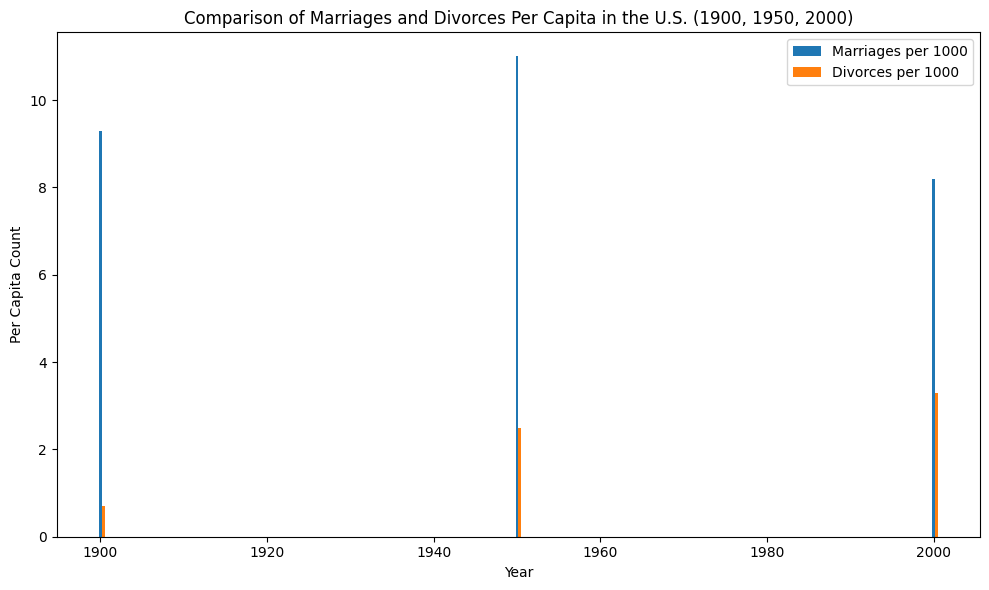

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file
data = pd.read_csv('us-marriages-divorces-1867-2014.csv')

# Filter data for the years 1900, 1950, and 2000
selected_years = [1900, 1950, 2000]
selected_data = data[data['Year'].isin(selected_years)]

# Create a vertical bar chart
plt.figure(figsize=(10, 6))
bar_width = 0.35

marriages_bars = plt.bar(selected_data['Year'], selected_data['Marriages_per_1000'], bar_width, label='Marriages per 1000')
divorces_bars = plt.bar(selected_data['Year'] + bar_width, selected_data['Divorces_per_1000'], bar_width, label='Divorces per 1000')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Per Capita Count')
plt.title('Comparison of Marriages and Divorces Per Capita in the U.S. (1900, 1950, 2000)')

# Add legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


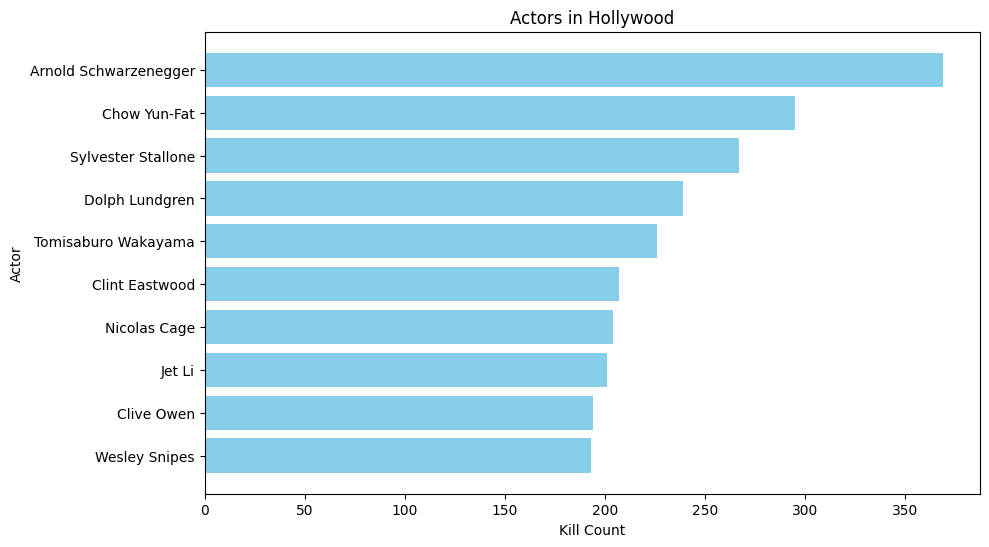

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file
data = pd.read_csv('actor_kill_counts.csv')

# Sort the data by kill count in descending order
data = data.sort_values(by='Count', ascending=True)

# Horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(data['Actor'], data['Count'], color='skyblue')

# Add labels and title
plt.xlabel('Kill Count')
plt.ylabel('Actor')
plt.title('Actors in Hollywood')

# Show the plot
plt.show()


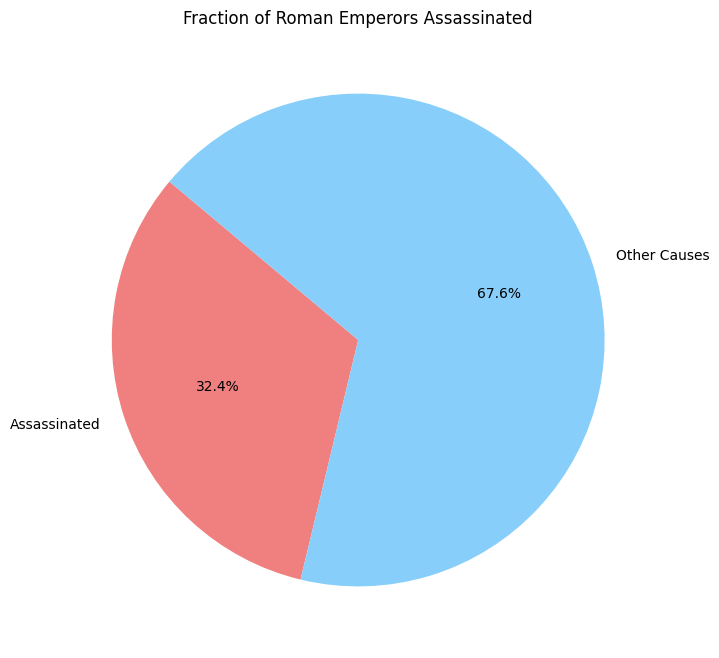

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file
data = pd.read_csv('roman-emperor-reigns.csv')

# Count the number of emperors assassinated
assassinated_count = data[data['Cause_of_Death'] == 'Assassinated'].shape[0]

# Count the number of emperors with other causes of death
other_count = data.shape[0] - assassinated_count

# Data for the pie chart
labels = ['Assassinated', 'Other Causes']
sizes = [assassinated_count, other_count]
colors = ['lightcoral', 'lightskyblue']

# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

# Add title
plt.title('Fraction of Roman Emperors Assassinated')

# Show the plot
plt.show()


In [ ]:
Question 10

Create a scatter plot showing the relationship between the total revenue earned byarcades and 
the number of Computer Science PhDs awarded in the U.S. between 2000 and 2009.
Don't forget to label your axes!
Color each dot according to its year.

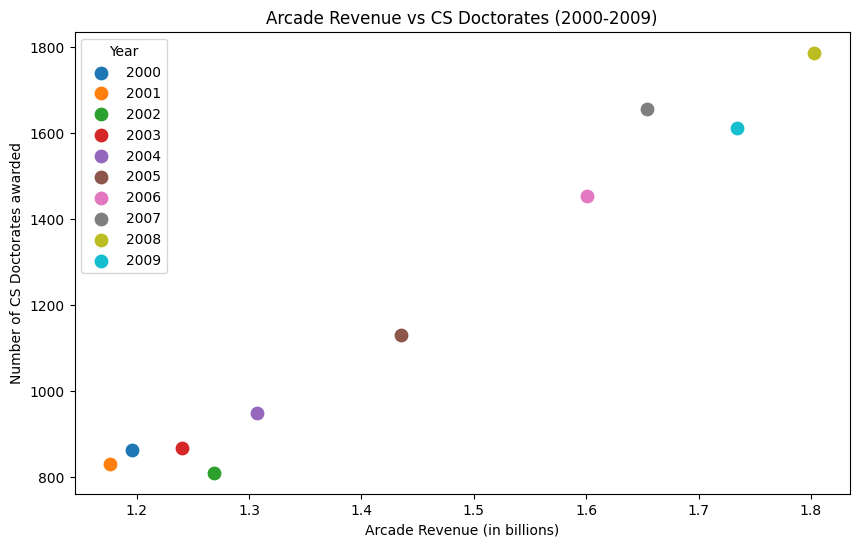

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file
data = pd.read_csv('arcade-revenue-vs-cs-doctorates.csv')

# Scatter plot
plt.figure(figsize=(10, 6))

# Scatter plot for each year
for year in data['Year'].unique():
    year_data = data[data['Year'] == year]
    plt.scatter(year_data['Total Arcade Revenue (billions)'], year_data['Computer Science Doctorates Awarded (US)'], label=str(year), s=80)

# Add labels and title
plt.title('Arcade Revenue vs CS Doctorates (2000-2009)')
plt.xlabel('Arcade Revenue (in billions)')
plt.ylabel('Number of CS Doctorates awarded')

# Add legend
plt.legend(title='Year')

# Show the plot
plt.show()
